# Median Age at death (2011-2015)
- The median age of death properly represents the quality of a neighboorhood because quality of life drastically decreases after death, so the longer one is expected to live, the better quality life they have. 
## Metric
- This dataset presents the total number of black, white, and combined deaths, as well as the median age of blacks, whites, and combined at death. Each of these categories is designated to the individual neighborhoods of Pittsburgh. The data plotted in the graphs is the median age at death.

- <https://data.wprdc.org/dataset/median-age-death> data retrieved: 15 April, 2021

### The Best neighborhood Analysis


In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='neighborhood'>

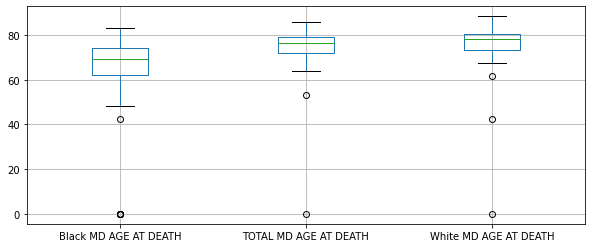

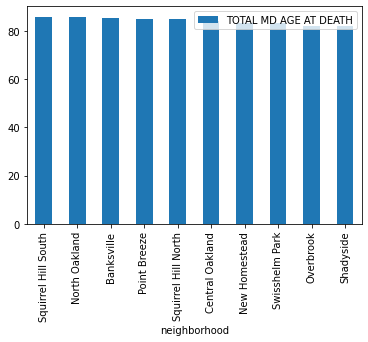

In [14]:
df = pd.read_csv("data/nhoodmedianage20112015.csv")
exclude = ['BLACKdeaths', 'WHITEdeaths', 'TOTALdeaths*']
df.loc[:, df.columns.difference(exclude)].boxplot(figsize = (10,4))
df.nlargest(10, ['TOTAL MD AGE AT DEATH']).set_index('neighborhood').plot.bar(y='TOTAL MD AGE AT DEATH')

In [7]:
age = pd.read_csv('data/nhoodmedianage20112015.csv')
md_age = age.groupby("neighborhood").sum()['TOTAL MD AGE AT DEATH']
md_age.sort_values(ascending=False)

neighborhood
Squirrel Hill South    85.9
North Oakland          85.6
Banksville             85.5
Point Breeze           85.1
Squirrel Hill North    85.0
                       ... 
Allegheny West         65.0
Arlington Heights      63.7
Fairywood              53.3
South Shore             0.0
Chateau                 0.0
Name: TOTAL MD AGE AT DEATH, Length: 90, dtype: float64

In [12]:
neighborhoods = gpd.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile

<AxesSubplot:>

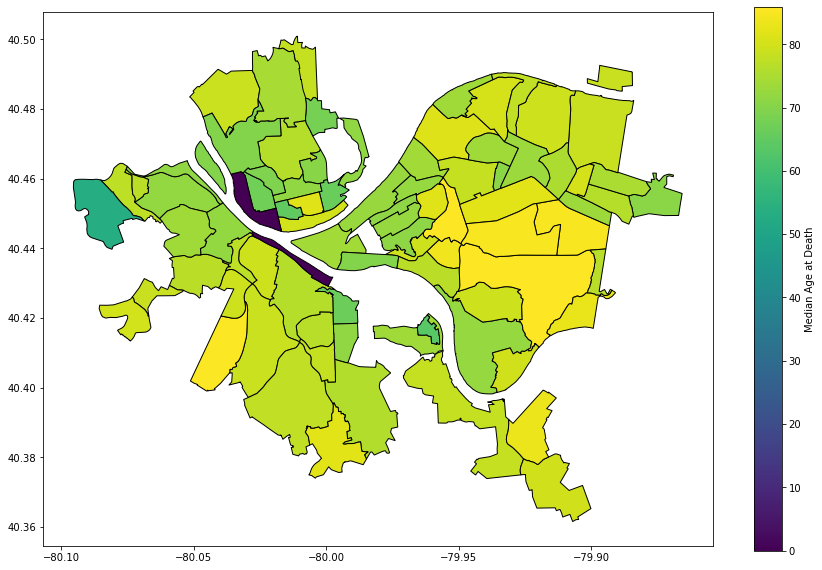

In [11]:
steps_map = neighborhoods.merge(md_age, how='left', left_on='hood', right_on='neighborhood')
steps_map[['hood','TOTAL MD AGE AT DEATH','geometry']].head()
steps_map.plot(column = 'TOTAL MD AGE AT DEATH', figsize = (15,10), edgecolor = "black", legend = True, legend_kwds = {'label': "Median Age at Death"})

# Conclusion
As shown by the graphs and map, The neighborhood with the highest average age at death is Squirrel hill south. The top results had very little deviation, so if youre looking to live a long time, its best to consider those neighborhoods.
